In [17]:
import importlib
import modules
import cellpylib as cpl
import numpy as np
import matplotlib.pyplot as plt
import scipy

importlib.reload(modules)

from modules import run_model
from modules import CA


In [43]:
def func(x, a, b):
    return [a * x_i ** -b for x_i in x]

def single_fit(x, y):
    popt1, pcov1 = scipy.optimize.curve_fit(func, x, y, p0=[1, 0.5])
    a1, b1 = popt1

    return a1, b1
        
def double_fit(x, y):
    highest_b2 = 0

    for index in range(int(len(x)*0.2), int(len(x)*0.8)):
        popt1, pcov1 = scipy.optimize.curve_fit(func, x[0:index], y[0:index], p0=[1, 0.5])
        a1, b1 = popt1

        popt2, pcov2 = scipy.optimize.curve_fit(func, x[index:], y[index:], p0=[1, 0.5])
        a2, b2 = popt2

        if b2 > highest_b2:
            highest_b2 = b2

            best_a1, best_b1, best_a2, best_b2 = a1, b1, a2, b2

            optimal_index = index

    return best_a1, best_b1, best_a2, best_b2, optimal_index

def find_intersection(x_data, a1, b1, a2, b2):
    x = np.linspace(1, np.max(x_data), np.max(x_data))
    y1 = func(x, a1, b1)
    y2 = func(x, a2, b2)
    for index in range(len(x)):
        if y1[index] >= y2[index]:
            return x[index]
        
    return None

def plot_fit(x, y, a1, b1, a2, b2):
    plt.clf()
    plt.loglog(x, y, 'o', markersize=2)
    plt.xlim(0, 1.1*np.max(x))
    plt.ylim(0, 1.1*np.max(y))
    plt.loglog(x, func(x, a1, b1))
    plt.loglog(x, func(x, a2, b2))
    plt.show()

def find_critical_size(density_list, n_simulations, L, T, n_repetitions):
    critical_size_dict = {}
    for p in density_list:
        for _ in range(n_simulations): 
            print(p)
            lifespan_counter, final_jams_counted = run_model(p, L, T, n_repetitions)
            lists = sorted(final_jams_counted.items()) # sorted by key, return a list of tuples

            x_data, y_data = zip(*lists)
            a_optimal1, b_optimal1, a_optimal2, b_optimal2, optimal_index = double_fit(x_data, y_data)

            critical_size = find_intersection(x_data, a_optimal1, b_optimal1, a_optimal2, b_optimal2)

            plot_fit(x_data, y_data, a_optimal1, b_optimal1, a_optimal2, b_optimal2)
            if critical_size == None:
                if p in critical_size_dict:
                    del critical_size_dict[p]        
                break

            else:
                if p not in critical_size_dict:
                    critical_size_dict[p] = [critical_size]
                else:
                    critical_size_dict[p] += [critical_size]

    return critical_size_dict
        

/var/folders/f8/8_w9799j2wlfkyxvlcmd3z180000gn/T/ipykernel_25693/790508404.py:43: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1.1*np.max(x))
/var/folders/f8/8_w9799j2wlfkyxvlcmd3z180000gn/T/ipykernel_25693/790508404.py:44: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1.1*np.max(y))


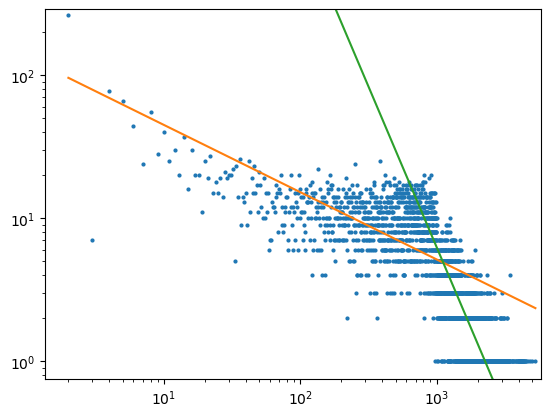

In [50]:
lifespan_counter, final_jams_counted = run_model(p=0.55, L=1000, T=500, n_repetitions = 100)

lists = sorted(final_jams_counted.items()) # sorted by key, return a list of tuples

x_data, y_data = zip(*lists)

best_a1, best_b1, best_a2, best_b2, optimal_index = double_fit(x_data, y_data)

plot_fit(x_data, y_data, best_a1, best_b1, best_a2, best_b2)

0.3


/var/folders/f8/8_w9799j2wlfkyxvlcmd3z180000gn/T/ipykernel_25693/790508404.py:43: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1.1*np.max(x))
/var/folders/f8/8_w9799j2wlfkyxvlcmd3z180000gn/T/ipykernel_25693/790508404.py:44: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1.1*np.max(y))


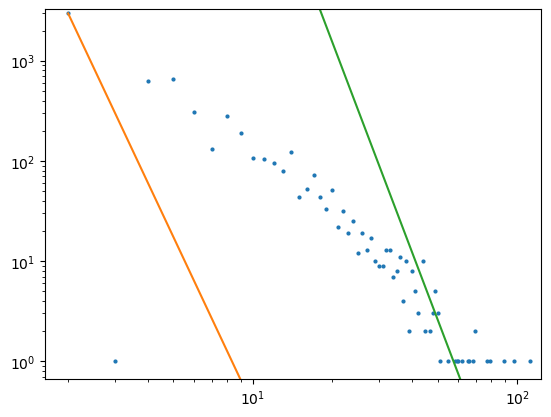

0.5


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

In [46]:
density_list = [0.55]
n_simulations = 2
L=1000
T=500
n_repetitions = 100

find_critical_size(density_list, n_simulations, L, T, n_repetitions)